In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib 

dd = pd.read_csv('simulations.csv')
dd['mmk'] = dd.m - dd.k

sns.lineplot(data=dd,
             x='mmk',
             y='cluster',
             hue='m')

# def OstarO(A, n=7):
#     return (A.T @ A).round(n)

Using matplotlib backend: <object object at 0x738e423220a0>


/home/yair/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/yair/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mmk', ylabel='cluster'>

In [7]:
m = 5 # Number of measurements
k = 2 # Rank of O^*O

## Diagonalized prior 
prior = np.eye(m) * 100
prior[0,0] = 0.1
prior[1,1] = 0.2
prior[2,2] = 4

## The posterior precision at the first k eigenvectors 
precision = m/k + np.mean(np.diag(prior)[:k])


# M = O^*O
M = np.zeros((m,m))
for i in range(k):
    M[i,i] = precision - prior[i,i]

## Find O such that O^*O = M and O has unit norm rows
O = get_A(M, m).T
OstarO(O)

## Since O[2,:] = -O[4,:] we have clusterization

array([[2.55, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 2.45, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

# Clustered


In [8]:
m = 5
k = 2

o1o2 = get_A(np.diag([0.55, 1.45]), k).T

O = np.zeros((m,k))
O[:2,:2] = o1o2
O[2,1] = 1
O[3,0] = 1
O[4,0] = 1

# Returns O^*O
OstarO(O)

array([[ 2.55, -0.  ],
       [-0.  ,  2.45]])

# Not Clustered


In [9]:
m = 5
k = 2

o1o2 = get_A(np.diag([0.75, 1.25]), k).T
o3o4 = get_A(np.diag([0.8, 1.2]), k).T

O = np.zeros((m,k))
O[:2,:2] = o1o2 
O[2:4,:2] = o3o4
O[4,0] = 1

# Returns O^*O
print(OstarO(O))

# Looks nicer
O = np.array([
    [np.sqrt(3/8), -np.sqrt(5/8)],
    [np.sqrt(3/8),  np.sqrt(5/8)],
    [np.sqrt(2/5), -np.sqrt(3/5)],
    [np.sqrt(2/5),  np.sqrt(3/5)],
    [1,             0           ]        
])

# Returns O^*O
print(OstarO(O))

[[2.55 0.  ]
 [0.   2.45]]
[[2.55 0.  ]
 [0.   2.45]]


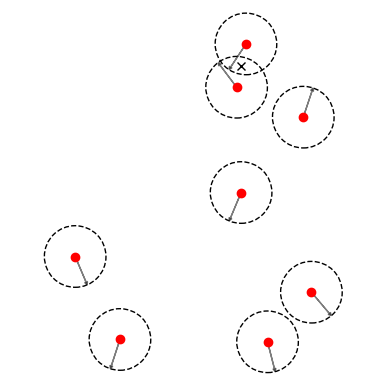

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Function to check for circle overlap
def circles_overlap(center1, center2, radius):
    return np.linalg.norm(center1 - center2) < 2 * radius

# Generate random points
np.random.seed(18)
points = np.random.rand(8, 2) * 10
w = 0.1
radius = 1.0 

# Plotting
fig, ax = plt.subplots()

# Plot points and circles
for point in points:
    ax.plot(point[0], point[1], 'ro')  # Plot the point
    circle = plt.Circle(point, radius, edgecolor='black', linestyle='--', fill=False)
    ax.add_artist(circle)  # Add the circle
    # Generate random angle for the arrow
    angle = np.random.rand() * 2 * np.pi
    dx = (radius-w) * np.cos(angle)
    dy = (radius-w) * np.sin(angle)
    ax.arrow(point[0], point[1], dx, dy, head_width=w, head_length=w, fc='black', ec='black', alpha=0.5)  # Arrow with opacity

# Check for overlaps and mark with X
for (i, j) in combinations(range(len(points)), 2):
    if circles_overlap(points[i], points[j], radius):
        midpoint = (points[i] + points[j]) / 2
        ax.plot(midpoint[0], midpoint[1], 'kx')  # Mark overlap with 'X'

# Set plot limits and remove axes
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Remove the axes

plt.savefig('constraints.png')
plt.show()


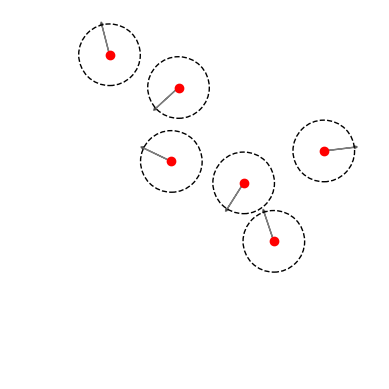

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Function to check for circle overlap
def circles_overlap(center1, center2, radius):
    return np.linalg.norm(center1 - center2) < 2 * radius

# Function to find close points and merge them
def merge_close_points(points, threshold):
    merged = True
    while merged:
        merged = False
        new_points = []
        skip_indices = set()
        for i, j in combinations(range(len(points)), 2):
            if i not in skip_indices and j not in skip_indices:
                if np.linalg.norm(points[i] - points[j]) < threshold:
                    new_point = (points[i] + points[j]) / 2
                    new_points.append(new_point)
                    skip_indices.add(i)
                    skip_indices.add(j)
                    merged = True
                    break
        for i in range(len(points)):
            if i not in skip_indices:
                new_points.append(points[i])
        points = np.array(new_points)
    return points

# Generate random points
#np.random.seed(0)
points = np.random.rand(10, 2) * 10
radius = 1.0

# Merge close points
threshold_distance = 2 * radius
points = merge_close_points(points, threshold_distance)

# Plotting
fig, ax = plt.subplots()

# Plot points and circles
for point in points:
    ax.plot(point[0], point[1], 'ro')  # Plot the point
    circle = plt.Circle(point, radius, edgecolor='black', linestyle='--', fill=False)
    ax.add_artist(circle)  # Add the circle
    # Generate random angle for the arrow
    angle = np.random.rand() * 2 * np.pi
    dx = radius * np.cos(angle)
    dy = radius * np.sin(angle)
    ax.arrow(point[0], point[1], dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black', alpha=0.5)  # Arrow with opacity

# Check for overlaps and mark with X
for (i, j) in combinations(range(len(points)), 2):
    if circles_overlap(points[i], points[j], radius):
        midpoint = (points[i] + points[j]) / 2
        ax.plot(midpoint[0], midpoint[1], 'kx')  # Mark overlap with 'X'

# Set plot limits and remove axes
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Remove the axes

plt.show()


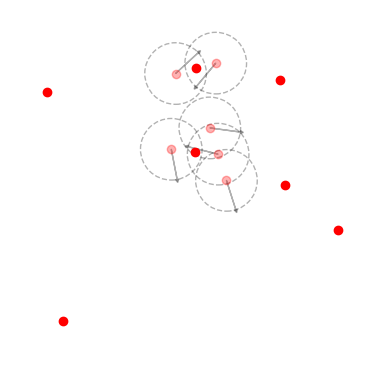

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Function to check for circle overlap
def circles_overlap(center1, center2, radius):
    return np.linalg.norm(center1 - center2) < 2 * radius

# Function to find close points and merge them, while keeping old points
def merge_close_points(points, threshold):
    merged = True
    old_points = []
    while merged:
        merged = False
        new_points = []
        skip_indices = set()
        for i, j in combinations(range(len(points)), 2):
            if i not in skip_indices and j not in skip_indices:
                if np.linalg.norm(points[i] - points[j]) < threshold:
                    new_point = (points[i] + points[j]) / 2
                    new_points.append(new_point)
                    old_points.append(points[i])
                    old_points.append(points[j])
                    skip_indices.add(i)
                    skip_indices.add(j)
                    merged = True
                    break
        for i in range(len(points)):
            if i not in skip_indices:
                new_points.append(points[i])
        points = np.array(new_points)
    return points, old_points

# Generate random points
np.random.seed(0)
points = np.random.rand(10, 2) * 10
radius = 1.0

# Merge close points
threshold_distance = 2 * radius
new_points, old_points = merge_close_points(points, threshold_distance)

# Plotting
fig, ax = plt.subplots()

# Plot old points and circles in pale red
for point in old_points:
    ax.plot(point[0], point[1], 'ro', alpha=0.3)  # Plot the old point
    circle = plt.Circle(point, radius, edgecolor='black', linestyle='--', fill=False, alpha=0.3)
    ax.add_artist(circle)  # Add the circle
    # Generate random angle for the arrow
    angle = np.random.rand() * 2 * np.pi
    dx = radius * np.cos(angle)
    dy = radius * np.sin(angle)
    ax.arrow(point[0], point[1], dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black', alpha=0.3)  # Arrow with opacity

# Plot new points without circles
for point in new_points:
    ax.plot(point[0], point[1], 'ro')  # Plot the new point

# Check for overlaps and mark with X
for (i, j) in combinations(range(len(new_points)), 2):
    if circles_overlap(new_points[i], new_points[j], radius):
        midpoint = (new_points[i] + new_points[j]) / 2
        ax.plot(midpoint[0], midpoint[1], 'kx')  # Mark overlap with 'X'

# Set plot limits and remove axes
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Remove the axes

plt.show()


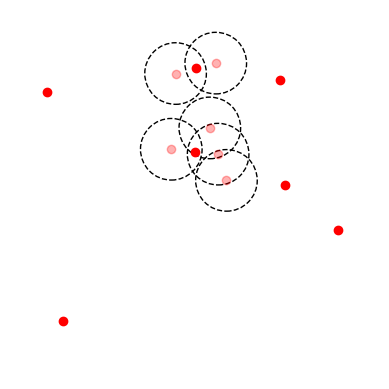

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Function to check for circle overlap
def circles_overlap(center1, center2, radius):
    return np.linalg.norm(center1 - center2) < 2 * radius

# Function to find close points and merge them, while keeping old points
def merge_close_points(points, threshold):
    merged = True
    old_points = []
    while merged:
        merged = False
        new_points = []
        skip_indices = set()
        for i, j in combinations(range(len(points)), 2):
            if i not in skip_indices and j not in skip_indices:
                if np.linalg.norm(points[i] - points[j]) < threshold:
                    new_point = (points[i] + points[j]) / 2
                    new_points.append(new_point)
                    old_points.append(points[i])
                    old_points.append(points[j])
                    skip_indices.add(i)
                    skip_indices.add(j)
                    merged = True
                    break
        for i in range(len(points)):
            if i not in skip_indices:
                new_points.append(points[i])
        points = np.array(new_points)
    return points, old_points

# Generate random points
np.random.seed(0)
points = np.random.rand(10, 2) * 10
radius = 1.0

# Merge close points
threshold_distance = 2 * radius
new_points, old_points = merge_close_points(points, threshold_distance)

# Plotting
fig, ax = plt.subplots()

# Plot old points and circles in pale red
for point in old_points:
    ax.plot(point[0], point[1], 'ro', alpha=0.3)  # Plot the old point
    circle = plt.Circle(point, radius, edgecolor='black', linestyle='--', fill=False)
    ax.add_artist(circle)  # Add the circle

# Plot new points without circles
for point in new_points:
    ax.plot(point[0], point[1], 'ro')  # Plot the new point

# Check for overlaps and mark with X
for (i, j) in combinations(range(len(new_points)), 2):
    if circles_overlap(new_points[i], new_points[j], radius):
        midpoint = (new_points[i] + new_points[j]) / 2
        ax.plot(midpoint[0], midpoint[1], 'kx')  # Mark overlap with 'X'

# Set plot limits and remove axes
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Remove the axes

plt.show()


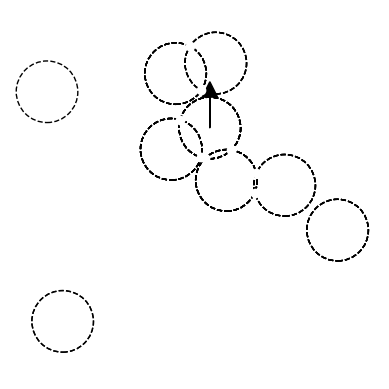

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Function to check for circle overlap and return the points of intersection
def circle_intersection(center1, center2, radius):
    d = np.linalg.norm(center1 - center2)
    if d >= 2 * radius:  # No overlap
        return None, None
    else:
        # Calculate intersection points
        a = (radius**2 - radius**2 + d**2) / (2 * d)
        h = np.sqrt(radius**2 - a**2)
        x0 = center1[0] + a * (center2[0] - center1[0]) / d
        y0 = center1[1] + a * (center2[1] - center1[1]) / d
        rx = -(center2[1] - center1[1]) * (h / d)
        ry = -(center2[0] - center1[0]) * (h / d)
        x1 = x0 + rx
        x2 = x0 - rx
        y1 = y0 - ry
        y2 = y0 + ry
        return (x1, y1), (x2, y2)

# Function to merge close points and generate new point
def merge_close_points(points, threshold):
    merged = True
    while merged:
        merged = False
        new_points = []
        skip_indices = set()
        for i, j in combinations(range(len(points)), 2):
            if i not in skip_indices and j not in skip_indices:
                if np.linalg.norm(points[i] - points[j]) < threshold:
                    new_point = (points[i] + points[j]) / 2
                    new_points.append(new_point)
                    skip_indices.add(i)
                    skip_indices.add(j)
                    merged = True
                    break
        for i in range(len(points)):
            if i not in skip_indices:
                new_points.append(points[i])
        points = np.array(new_points)
    return points

# Generate random points
np.random.seed(0)
points = np.random.rand(10, 2) * 10

# Merge close points
threshold_distance = 1.0
points = merge_close_points(points, threshold_distance)

# Plotting
fig, ax = plt.subplots()

# Plot circles around original points, removing overlapping parts
for i, point1 in enumerate(points):
    for point2 in points[i+1:]:
        if np.linalg.norm(point1 - point2) < 2:
            intersection1, intersection2 = circle_intersection(point1, point2, 1)
            if intersection1 is not None and intersection2 is not None:
                circle1 = plt.Circle(point1, 1, edgecolor='black', linestyle='--', fill=False)
                circle2 = plt.Circle(point2, 1, edgecolor='black', linestyle='--', fill=False)
                ax.add_artist(circle1)
                ax.add_artist(circle2)
                ax.plot(*intersection1, marker='o', color='white', markersize=6)  # Remove overlapping parts
                ax.plot(*intersection2, marker='o', color='white', markersize=6)
        else:
            circle = plt.Circle(point1, 1, edgecolor='black', linestyle='--', fill=False)
            ax.add_artist(circle)

# Find a single point that was not merged
single_point = None
for i, point in enumerate(points):
    if i not in np.unique(np.where(np.diff(points, axis=0) == 0)[0]):
        single_point = point
        break

# Draw arrow from single point to its corresponding circle
if single_point is not None:
    ax.arrow(single_point[0], single_point[1], 0, 1, head_width=0.5, head_length=0.5, fc='black', ec='black')

# Set plot limits and remove axes
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Remove the axes

plt.show()


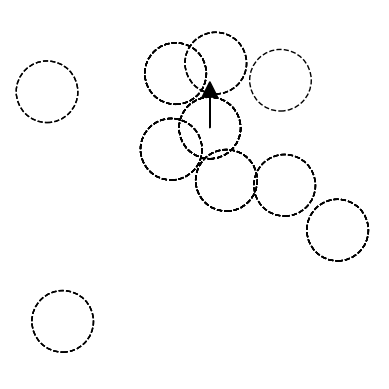

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Function to check for circle overlap and return the points of intersection
def circle_intersection(center1, center2, radius):
    d = np.linalg.norm(center1 - center2)
    if d >= 2 * radius:  # No overlap
        return None, None
    else:
        # Calculate intersection points
        a = (radius**2 - radius**2 + d**2) / (2 * d)
        h = np.sqrt(radius**2 - a**2)
        x0 = center1[0] + a * (center2[0] - center1[0]) / d
        y0 = center1[1] + a * (center2[1] - center1[1]) / d
        rx = -(center2[1] - center1[1]) * (h / d)
        ry = -(center2[0] - center1[0]) * (h / d)
        x1 = x0 + rx
        x2 = x0 - rx
        y1 = y0 - ry
        y2 = y0 + ry
        return (x1, y1), (x2, y2)

# Function to merge close points and generate new point
def merge_close_points(points, threshold):
    merged = True
    while merged:
        merged = False
        new_points = []
        skip_indices = set()
        for i, j in combinations(range(len(points)), 2):
            if i not in skip_indices and j not in skip_indices:
                if np.linalg.norm(points[i] - points[j]) < threshold:
                    new_point = (points[i] + points[j]) / 2
                    new_points.append(new_point)
                    skip_indices.add(i)
                    skip_indices.add(j)
                    merged = True
                    break
        for i in range(len(points)):
            if i not in skip_indices:
                new_points.append(points[i])
        points = np.array(new_points)
    return points

# Generate random points
np.random.seed(0)
points = np.random.rand(10, 2) * 10

# Merge close points
threshold_distance = 1.0
points = merge_close_points(points, threshold_distance)

# Plotting
fig, ax = plt.subplots()

# Plot circles around original points that were not merged
for i, point1 in enumerate(points):
    if i not in np.unique(np.where(np.diff(points, axis=0) == 0)[0]):
        circle = plt.Circle(point1, 1, edgecolor='black', linestyle='--', fill=False)
        ax.add_artist(circle)

# Plot the union of circles around merged points, excluding intersection part
for i, point1 in enumerate(points):
    for point2 in points[i+1:]:
        if np.linalg.norm(point1 - point2) < 2:
            intersection1, intersection2 = circle_intersection(point1, point2, 1)
            if intersection1 is not None and intersection2 is not None:
                circle = plt.Circle(point1, 1, edgecolor='black', linestyle='--', fill=False)
                ax.add_artist(circle)
                arc = plt.Polygon([point1, intersection1, intersection2], color='white')
                ax.add_patch(arc)
        else:
            circle = plt.Circle(point1, 1, edgecolor='black', linestyle='--', fill=False)
            ax.add_artist(circle)

# Find a single point that was not merged
single_point = None
for i, point in enumerate(points):
    if i not in np.unique(np.where(np.diff(points, axis=0) == 0)[0]):
        single_point = point
        break

# Draw arrow from single point to its corresponding circle
if single_point is not None:
    ax.arrow(single_point[0], single_point[1], 0, 1, head_width=0.5, head_length=0.5, fc='black', ec='black')

# Set plot limits and remove axes
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')  # Remove the axes

plt.show()


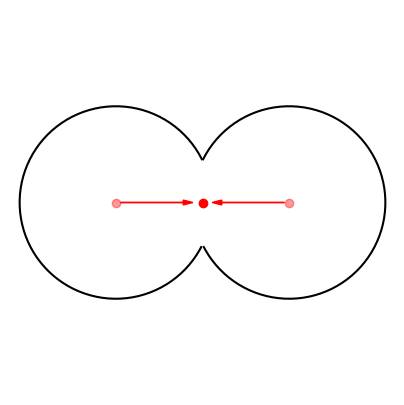

In [109]:
grid = np.linspace(0, 2*np.pi, num=200)

circle = np.vstack([np.sin(grid), np.cos(grid)]).T

x1 = np.array([0.9,0])
circ1 = circle + x1
ind = np.where(circ1[:,0] > 0)[0]
shift = -np.diff(ind).argmax()-1
circ1 = np.roll(circ1, shift, axis=0)
ii = np.where(circ1[:,0] > 0)[0]
circ1 = circ1[ii,:]


circ2 = circ1.copy()
circ2[:,0] = -circ2[:,0]

plt.figure(figsize=(5,5))
plt.plot(circ1[:,0], circ1[:,1], color='k')
plt.plot(circ2[:,0], circ2[:,1], color='k')


plt.scatter(0,0, color='r')
plt.scatter([0.9, -0.9], [0,0], color='r', alpha=0.4)

plt.arrow(0.85, 0, -0.65, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(-0.85, 0, 0.65, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.gca().set_aspect('equal', adjustable='box')

# Remove the plot border (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks([])
plt.yticks([])

plt.savefig('merge.png')

In [47]:
c = circ1[circ1[:,0].argsort(),:]
c#plt.plot(c[:,0], c[:,1])


array([[ 6.00000000e-01,  1.00000000e+00],
       [ 6.00000000e-01,  1.00000000e+00],
       [ 6.00000000e-01, -1.00000000e+00],
       [ 1.30710678e+00,  7.07106781e-01],
       [ 1.30710678e+00, -7.07106781e-01],
       [ 1.60000000e+00,  6.12323400e-17]])

In [67]:
shift

16